### Script pour interpreter les résultats du benchmark

In [11]:
import matplotlib 
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import cv2
import json

In [74]:
def carte(matched,positions,vt,meta):
    
    fresque = cv2.imread(meta['base_dir']+'fresque{}.ppm'.format(meta['fresque_id']))
    
    fig,ax = plt.subplots()
    ax.imshow(fresque)
    for i,p in enumerate(positions):
        if(matched[i]==1):
            #ax.plot(int(vt[i][3]),int(vt[i][2]),marker='D')
            ax.plot([int(vt[i][3])*4,p[1]],[int(vt[i][2])*4,p[2]],marker='D')
    fig.show()

In [38]:
results_filename = 'results_f4_01-25_23-36'

<IPython.core.display.Javascript object>


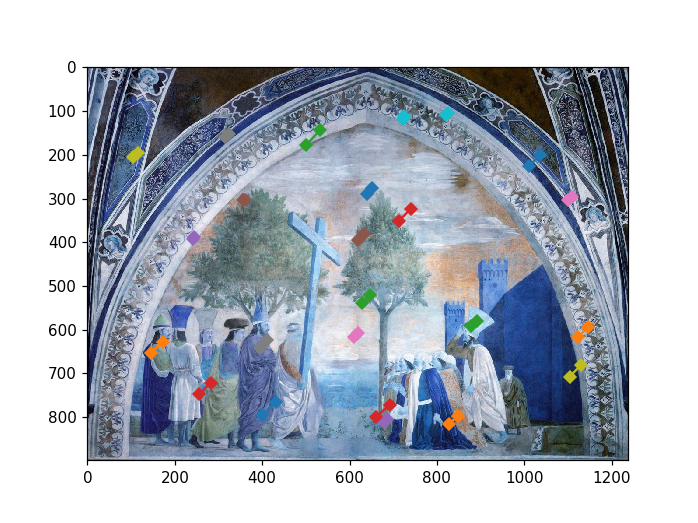

Benchmark de la fresque 4:
Moyenne de placement trouvé:...0.9230769230769231
Moyenne de distance:...........23.340344542211625
Ecart type des distances:......13.265681914279869


In [81]:
with open(results_filename,'r') as f:
    res = json.loads(f.readline())

p = res['positions']
m = res['matched']
v = []
for i,vt in enumerate(res['vt']):
    if m[i] == 1:
        v.append([vt[0],vt[1],int(vt[2])*4,int(vt[3])*4])
    else:
        v.append([])


carte(res['matched'],res['positions'],res['vt'],res['meta'])


#print(res['meta']['fresque_taille'])

#for i in range(len(res['vt'])):
#    print(int(res['vt'][i][2]*4))

distances = [np.linalg.norm([v[i][3]-p[i][1],v[i][2]-p[i][2]]) for i in range(len(m)) if m[i] == 1]

# Affiche quelques stats:
print("Benchmark de la fresque {}:".format(res['meta']['fresque_id']))
print("Moyenne de placement trouvé:...{}".format(np.average(res['matched'])))
print("Moyenne de distance:...........{}".format(np.average(distances)))
print("Ecart type des distances:......{}".format(np.std(distances)))
